# Data:

**Random toy data**

**Columns:**

1. **Name** ----- Name of the Applicant
2. **Age** ----------- Applicant's age in years
3. **Education Level** ---- Highest educational achievement (High School = HS, College Degree = CD)
4. **Experience** -------- Years of Professional experience
4. **Salary** -------- Current Monthly Pay 
5. **Loan Status** ------- 1 = got a loan, 0 = did not get a loan

**Goal:** To predict Salary based on Age, Educational Level and Experience

In [1]:
# Creating the Dataset
import pandas as pd

Data = {'Name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'Education Level':['HS', 'HS', 'CD', 'HS', 'CD', 'CD', 'CD', 'HS', 'CD', 'HS'], 'Age': [30, 35, 27, 40, 44, 31, 50, 28, 55, 39], 'Experience': [10, 7, 9, 17, 24, 12, 30, 9, 27, 20], 'Salary': [3700, 3200, 3300, 4500, 5700, 4200, 6200, 3500, 4200,5500],'Loan Status':[1,0, 1, 1, 0, 0, 0,1, 0,1]}
df = pd.DataFrame(Data)
df                         # df is now the name of our dataset

,Name,Education Level,Age,Experience,Salary,Loan Status
0,A,HS,30,10,3700,1
1,B,HS,35,7,3200,0
2,C,CD,27,9,3300,1
3,D,HS,40,17,4500,1
4,E,CD,44,24,5700,0
5,F,CD,31,12,4200,0
6,G,CD,50,30,6200,0
7,H,HS,28,9,3500,1
8,I,CD,55,27,4200,0
9,J,HS,39,20,5500,1


# Properties of Data

## Shape

In [2]:
df.shape

(10, 6)

***The Dataset has 10 rows and 6 columns***

## Columns

In [3]:
df.columns

Index(['Name', 'Education Level', 'Age', 'Experience', 'Salary',
       'Loan Status'],
      dtype='object')

***List of columns in the dataset***

## Data Types

In [4]:
df.dtypes

Name               object
Education Level    object
Age                 int64
Experience          int64
Salary              int64
Loan Status         int64
dtype: object

***Name and Education Level are non-numeric, all other data is numeric***

# Encoding the Categorical Columns using the Label Encoder

Not considering name as predictor

In [5]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()

df['Education Level']= label_encoder.fit_transform(df['Education Level'])

  
df['Education Level'].unique()

array([1, 0])

In [6]:
df

,Name,Education Level,Age,Experience,Salary,Loan Status
0,A,1,30,10,3700,1
1,B,1,35,7,3200,0
2,C,0,27,9,3300,1
3,D,1,40,17,4500,1
4,E,0,44,24,5700,0
5,F,0,31,12,4200,0
6,G,0,50,30,6200,0
7,H,1,28,9,3500,1
8,I,0,55,27,4200,0
9,J,1,39,20,5500,1


**1** = HS

**0** = CD

## Scatter Plots

### 1. Experience v Salary

<AxesSubplot:xlabel='Experience', ylabel='Salary'>

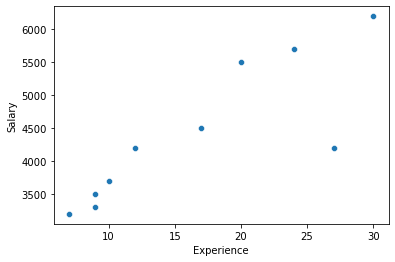

In [7]:
import seaborn as sns
sns.scatterplot(data=df, x=df['Experience'], y=df['Salary'])

### 2. Age v Salary

<AxesSubplot:xlabel='Age', ylabel='Salary'>

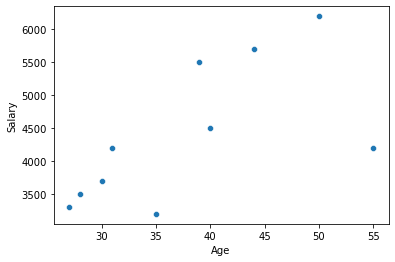

In [8]:
sns.scatterplot(data=df, x=df['Age'], y=df['Salary'])

## 3. Education v Salary

<AxesSubplot:xlabel='Education Level', ylabel='Salary'>

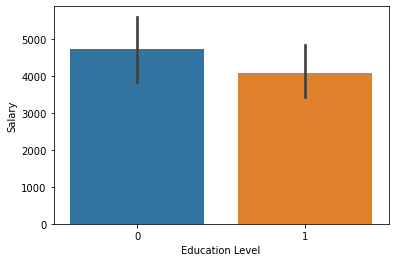

In [9]:
sns.barplot(data=df, x=df['Education Level'], y=df['Salary'])

# Defining the Predictors and the Response

In [10]:
X = df[['Education Level', 'Experience','Age']]
y = df['Salary']

In [11]:
X

,Education Level,Experience,Age
0,1,10,30
1,1,7,35
2,0,9,27
3,1,17,40
4,0,24,44
5,0,12,31
6,0,30,50
7,1,9,28
8,0,27,55
9,1,20,39


In [12]:
y

0    3700
1    3200
2    3300
3    4500
4    5700
5    4200
6    6200
7    3500
8    4200
9    5500
Name: Salary, dtype: int64

# Fitting the Model

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

# Making Predictions

In [14]:
y_pred = lr.predict(X)
y_pred

array([3947.58054301, 2676.34666539, 3596.39219413, 4508.99990625,
       5290.96280913, 3868.71204894, 6057.58341271, 3930.80088939,
       4786.34953509, 5336.27199596])

# Model Parameters

## 1. The Intercept

In [15]:
b0 = lr.intercept_
b0

4444.289334380066

## 2. The Slope Coefficients

In [16]:
b1 = lr.coef_
b1

array([ 445.39914224,  238.76054758, -110.99044698])

## 3. The Residuals / Errors

In [17]:
residuals = y_pred - y
residuals

0    247.580543
1   -523.653335
2    296.392194
3      8.999906
4   -409.037191
5   -331.287951
6   -142.416587
7    430.800889
8    586.349535
9   -163.728004
Name: Salary, dtype: float64

#  Squared Sum of Errors (Residual Sum of Squares)

In [18]:
RSS = (residuals**2).sum()
RSS

1276985.9284550354

# Total Sum of Squares

In [19]:
TSS = ((y - y.mean())**2).sum()
TSS

10180000.0

# $R^2$ Statistic from Test Data

In [20]:
R_square =  ((TSS - RSS)/TSS)
R_square

0.8745593390515681

# Mean Squared Error (MSE)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

127698.59284550355

# Mean Absolute Error

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

314.0246135746073

# Mean Absolute % Error

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y, y_pred)

0.07884422630479819